In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://basketball.realgm.com/national/tournament/2/FIBA-World-Cup/318/rosters'
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    # Find the player information on the page and extract the relevant data
    # Iterate over each player and extract their details
    players = []
    player_elements = soup.find_all('div', class_='player')
tables = pd.read_html(url)


In [31]:
FranceTeam = [pd.DataFrame(table) for table in tables if all(table['Nationality'].str.contains('France'))][0]
FranceTeam

,Player,Pos,HT,WT,Birth City,Birth Date,Pre-NBA Draft Team,Nationality
0,Nicolas Batum,F,6-8,230,Lisieux,"Dec 14, 1988",Le Mans Sarthe Basket (France),France
1,Isaia Cordinier,G,6-5,197,Creteil,"Nov 28, 1996",Denain ASC Voltaire (France),France
2,Nando De Colo,G,6-5,195,Sainte-Catherine-les-Arras,"Jun 23, 1987",Cholet Basket (France),France
3,Moustapha Fall,PF,7-2,235,Paris,"Feb 23, 1992",Poitiers Basket 86 (France),France
4,Evan Fournier,SG,6-6,205,Saint-Maurice,"Oct 29, 1992",Poitiers Basket 86 (France),France
5,Sylvain Francisco,G,6-2,170,"Tavares, FL","Oct 10, 1997",Boulogne-Levallois (France),United States France
6,Rudy Gobert,C,7-1,258,Saint-Quentin,"Jun 26, 1992",Cholet Basket (France),France
7,Mathias Lessort,F,6-9,250,Fort-de-France,"Sep 29, 1995",Nanterre 92 (France),France
8,Elie Okobo,PG,6-3,190,Bordeaux,"Oct 23, 1997",Pau-Orthez (France),France
9,Yakuba Ouattara,SG,6-4,220,Tema,"Jan 24, 1992",Chalon-Sur-Saone (France),Ghana France


In [33]:
import numpy as np
pd.DataFrame(np.array(FranceTeam)) 

,0,1,2,3,4,5,6,7
0,Nicolas Batum,F,6-8,230,Lisieux,"Dec 14, 1988",Le Mans Sarthe Basket (France),France
1,Isaia Cordinier,G,6-5,197,Creteil,"Nov 28, 1996",Denain ASC Voltaire (France),France
2,Nando De Colo,G,6-5,195,Sainte-Catherine-les-Arras,"Jun 23, 1987",Cholet Basket (France),France
3,Moustapha Fall,PF,7-2,235,Paris,"Feb 23, 1992",Poitiers Basket 86 (France),France
4,Evan Fournier,SG,6-6,205,Saint-Maurice,"Oct 29, 1992",Poitiers Basket 86 (France),France
5,Sylvain Francisco,G,6-2,170,"Tavares, FL","Oct 10, 1997",Boulogne-Levallois (France),United States France
6,Rudy Gobert,C,7-1,258,Saint-Quentin,"Jun 26, 1992",Cholet Basket (France),France
7,Mathias Lessort,F,6-9,250,Fort-de-France,"Sep 29, 1995",Nanterre 92 (France),France
8,Elie Okobo,PG,6-3,190,Bordeaux,"Oct 23, 1997",Pau-Orthez (France),France
9,Yakuba Ouattara,SG,6-4,220,Tema,"Jan 24, 1992",Chalon-Sur-Saone (France),Ghana France


In [4]:

def format_last_season(int_last_season, int=True):
    # Keep only the first row for each player
    df = int_last_season.copy()
    # Get unique team names and leagues from the other rows
    unique_teams = df[df['Team'] != 'All Teams']['Team'].unique()
    if int:
        unique_leagues = df[df['League'] != 'All Leagues']['League'].unique()
        df.loc[df['League'] == 'All Leagues', 'League'] = ', '.join(unique_leagues)

    # Replace 'All Teams' and 'All Leagues' with the unique values
    df.loc[df['Team'] == 'All Teams', 'Team'] = ', '.join(unique_teams)
    return df.drop_duplicates(subset='Player', keep='first')


25 years old


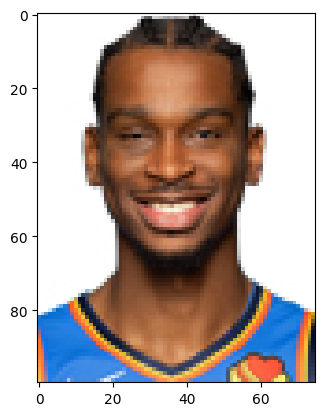

In [5]:
from PIL import Image
from io import BytesIO

for links in soup.find_all('a'):
    if links.text=='Shai Gilgeous-Alexander':
        href = 'https://basketball.realgm.com/'+links.get('href')
        response2 = requests.get(href)
        if response2.status_code == 200:
            soup2 = BeautifulSoup(response2.content, 'html.parser')
            for texts in soup2.find_all('p'):
                if 'Born' in texts.text:
                    age = ' '.join(texts.text.split(' ')[4:]).replace('(', '').replace(')', '')
                    print(age)
                if 'Hand' in texts.text:
                    hand = texts.text.split(' ')[1]
                    print(hand)
            for imgs in soup2.find_all('img'):
                if 'Shai Gilgeous-Alexander'.split(' ')[-1].replace('-', '').capitalize() in imgs.get('src'):
                    import matplotlib.pyplot as plt

                    response = requests.get('https://basketball.realgm.com/'+imgs.get('src'))
                    img = Image.open(BytesIO(response.content))
                    break
plt.imshow(img)


In [6]:
nba_table

NameError: name 'nba_table' is not defined

In [ ]:
nba_table[(nba_table['Season'] == '2023-24 *')|(nba_table['Season']=='2023-24')|(nba_table['Season']=='2023-24 ☆')]

,Season,Team,GP,GS,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OFF,DEF,TRB,AST,STL,BLK,TOV,PF
5,2023-24 ☆,OKC,75,75,34.0,30.05,10.61,19.83,0.535,1.27,...,8.65,0.874,0.87,4.67,5.53,6.2,2.0,0.89,2.16,2.45


In [7]:
last_season_data = pd.DataFrame()
nba_tables = [pd.DataFrame(table) for table in player_tables if 'Team' in table.columns and any(table['Team'].str.contains('BOS|MIL|CLE|ORL|NYK|IND|MIA|PHI|CHI|ATL|BRK|TOR|CHO|WAS|DET|MIN|DEN|OKC|LAC|DAL|PHO|NOP|SAC|LAL|GSW|HOU|UTA|MEM|POR|SAS'))]
print(len(nba_tables))
if len(nba_tables)>0:
    nba_table = nba_tables[0]
    nba_last_season = nba_table[(nba_table['Season'] == '2023-24 *')|(nba_table['Season']=='2023-24')|(nba_table['Season']=='2023-24 ☆')][['Team','GP', 'MIN', 'PTS', 'TRB', 'AST', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'DEF', 'STL', 'BLK', 'PF', 'TOV']]
    print(len(nba_last_season))
    if len(nba_last_season) >0:
        print(nba_last_season)
        nba_last_season['Player'] = 'Shai Gilgeous-Alexander'
        nba_last_season_ = format_last_season(nba_last_season, int=False)
        last_season_data = pd.concat([last_season_data, nba_last_season_])


# international_tables = [pd.DataFrame(table) for table in tables_player if 'League' in table.columns and not any(table['Team'].str.contains('BOS|MIL|CLE|ORL|NYK|IND|MIA|PHI|CHI|ATL|BRK|TOR|CHO|WAS|DET|MIN|DEN|OKC|LAC|DAL|PHO|NOP|SAC|LAL|GSW|HOU|UTA|MEM|POR|SAS'))]
#     if len(international_tables) >0:
#         international_table = international_tables[0]
#         int_last_season = international_table[(international_table['Season'] == '2023-24 *')|(international_table['Season']=='2023-24')][['Team', 'League','GP', 'MIN', 'PTS', 'TRB', 'AST', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'DEF', 'STL', 'BLK', 'PF', 'TOV']]
#         if len(int_last_season) >0:
#             int_last_season['Player'] = player
#             int_last_season_ = format_last_season(int_last_season)
#             last_season_data = pd.concat([last_season_data, int_last_season_])
#     return last_season_data


NameError: name 'player_tables' is not defined

In [31]:
from auxiliar_fns import NBA_teams_dict
NBA_teams_dict[last_season_data[last_season_data['Player'] == 'Shai Gilgeous-Alexander']['Team'].tolist()[0]]

'Oklahoma City Thunder, USA'

In [10]:
for links in soup.find_all('a'):
    if links.text=='Evan Fournier':
        href = 'https://basketball.realgm.com/'+links.get('href')
        response2 = requests.get(href)
        if response2.status_code == 200:
            soup2 = BeautifulSoup(response2.content, 'html.parser')
            player_tables = pd.read_html(href)
            # last_season_data = get_last_season_data(pd.DataFrame(), player_tables, 'Shai Gilgeous-Alexander')

In [21]:
tables

[<table cellpadding="0" cellspacing="0" class="game unplayed" style="clear: none; width: 32%; float: left;">
 <tr>
 <th colspan="3">
 7:00 PM ET</th>
 </tr>
 <tr>
 <td class="game_details">
 <div class="team_name"><h3><a href="/nba/teams/New-York-Knicks/20/Rosters/Current/2024">New York</a></h3></div>
 <div class="team_record"><a href="/nba/teams/New-York-Knicks/20/Schedule/2024">(50-32)</a></div>
 </td>
 <td style="width: 4%"><h3>at</h3></td>
 <td class="game_details">
 <div class="team_name"><h3><a href="/nba/teams/Indiana-Pacers/11/Rosters/Current/2024">Indiana</a></h3></div>
 <div class="team_record"><a href="/nba/teams/Indiana-Pacers/11/Schedule/2024">(47-35)</a></div>
 </td>
 </tr>
 <tr>
 <td class="game_details">
 </td>
 <td></td>
 <td class="game_details">
 </td>
 </tr>
 <tr>
 <td colspan="3">
 <table cellpadding="0" cellspacing="0" class="game_stats" width="100%">
 <tr>
 <th class="top" colspan="5">
 <a href="/nba/preview/2024-05-10/New-York-at-Indiana/466577/Easternsemifinals

In [20]:
tables = soup2.find_all('table')
# Read tables into DataFrame using read_html()
df = pd.read_html(str(tables))[0]
df

/var/folders/tg/9lndc6jj2nj2j6zsv7pmzgrc0000gn/T/ipykernel_42943/3579756156.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables))[0]


,7:00 PM ET,7:00 PM ET.1,7:00 PM ET.2
0,New York (50-32),at,Indiana (47-35)
1,NaN,NaN,NaN
2,Preview Playoffs,Preview Playoffs,Preview Playoffs


In [25]:
table_html = str(soup2.find(lambda tag: tag.name == "h2" and "NBA Regular Season Stats - Per Game" in tag.text).find_next("table"))
df = pd.read_html(table_html)[0]
df

/var/folders/tg/9lndc6jj2nj2j6zsv7pmzgrc0000gn/T/ipykernel_42943/2624108201.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,Season,Team,GP,GS,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OFF,DEF,TRB,AST,STL,BLK,TOV,PF
0,2012-13,DEN,38,4,11.3,5.32,1.97,4.00,0.493,0.58,...,1.03,0.769,0.16,0.76,0.92,1.16,0.50,0.03,0.84,1.71
1,2013-14,DEN,76,4,19.8,8.39,3.00,7.16,0.419,1.17,...,1.62,0.756,0.45,2.21,2.66,1.47,0.45,0.09,1.32,2.36
2,2014-15,ORL,58,32,28.6,12.03,4.36,9.91,0.440,1.47,...,2.53,0.728,0.48,2.16,2.64,2.07,0.69,0.03,1.41,2.00
3,2015-16,ORL,79,71,32.5,15.35,5.43,11.76,0.462,1.97,...,3.01,0.836,0.42,2.43,2.85,2.70,1.22,0.03,1.68,2.71
4,2016-17,ORL,68,66,32.8,17.16,6.00,13.68,0.439,1.88,...,4.07,0.805,0.65,2.43,3.07,2.97,0.97,0.06,2.07,2.65
5,2017-18,ORL,57,57,32.2,17.77,6.46,14.07,0.459,2.23,...,3.04,0.867,0.40,2.75,3.16,2.89,0.82,0.28,1.67,2.42
6,2018-19,ORL,81,81,31.5,15.14,5.78,13.20,0.438,1.89,...,2.10,0.806,0.47,2.72,3.19,3.64,0.88,0.15,1.90,2.78
7,2019-20,ORL,66,66,31.4,18.50,6.58,14.08,0.467,2.62,...,3.33,0.818,0.27,2.32,2.59,3.17,1.08,0.23,1.89,2.44
8,2020-21 *,All Teams,42,36,30.0,17.12,5.88,12.88,0.457,2.79,...,3.26,0.788,0.24,2.81,3.05,3.43,1.12,0.45,1.74,2.29
9,2020-21 *,ORL,26,26,30.3,19.65,6.54,14.19,0.461,2.81,...,4.73,0.797,0.19,2.69,2.88,3.65,1.04,0.35,2.08,2.12


In [26]:
table_html = str(soup2.find(lambda tag: tag.name == "h2" and "FIBA Senior Team Events Stats" in tag.text).find_next("table"))
df = pd.read_html(table_html)[0]
df

/var/folders/tg/9lndc6jj2nj2j6zsv7pmzgrc0000gn/T/ipykernel_42943/1597362850.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,Year,Event,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTM,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,Place
0,2023,FIBA World Cup,5,22:46,13.8,4.8,11.2,.429,2.2,6.8,...,2.0,2.6,.769,3.2,1.4,0.8,0.2,2.8,1.8,18th
1,2022,EuroBasket,9,29:27,15.3,5.3,13.2,.403,2.4,7.2,...,2.2,2.9,.769,2.9,3.0,0.9,0.0,2.0,2.9,Silver
2,2021,European World Cup Qualifier,2,30:11,15.5,5.0,16.0,.312,3.0,9.5,...,2.5,4.5,.556,3.0,2.5,3.0,0.0,4.0,2.0,Silver
3,2021,Olympic Games,6,28:15,18.7,6.7,14.7,.455,2.8,7.5,...,2.5,3.0,.833,3.2,2.5,0.3,0.0,2.7,2.7,Silver
4,2020,EuroBasket Qualifiers,-,-:-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,2019,FIBA World Cup,8,28:09,19.8,7.2,17.2,.420,2.0,4.9,...,3.2,4.5,.722,3.8,3.0,0.9,0.1,1.9,2.5,Bronze
6,2017,European World Cup Qualifier,2,25:07,12.5,4.5,9.0,.500,1.0,4.5,...,2.5,2.5,1.000,1.5,3.5,1.0,0.0,1.0,2.5,Bronze
7,2017,EuroBasket,6,24:06,15.8,5.2,10.8,.477,1.7,4.5,...,3.8,4.7,.821,2.3,1.7,1.7,0.0,1.5,2.5,12th
8,2016,Olympic Qualifier - Philippines,-,-:-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Gold
9,2015,EuroBasket,9,15:20,6.8,2.3,5.2,.447,1.3,2.7,...,0.8,0.9,.875,1.8,1.4,0.7,0.1,0.9,2.3,Bronze


In [28]:
table_html = str(soup2.find(lambda tag: tag.name == "h2" and "International Regular Season Stats - Per Game" in tag.text).find_next("table"))
df = pd.read_html(table_html)[0]
df

/var/folders/tg/9lndc6jj2nj2j6zsv7pmzgrc0000gn/T/ipykernel_42943/2501601473.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,Season,Team,League,GP,GS,MIN,PTS,FGM,FGA,FG%,...,FTA,FT%,OFF,DEF,TRB,AST,STL,BLK,TOV,PF
0,2010-11,Poitiers Basket 86,Jeep Elite,29,1,14.4,6.45,2.41,5.41,0.446,...,1.52,0.841,0.76,1.28,2.03,0.66,0.66,0.10,0.83,2.17
1,2011-12,Poitiers Basket 86,Jeep Elite,30,18,26.0,14.03,4.90,11.53,0.425,...,3.93,0.754,1.13,2.07,3.20,2.20,1.50,0.13,2.17,3.10


In [14]:
for table in soup2.find_all('table'):
    if 'Team' in table.text:
        if table.thead.text == "per_game per_48 per_40 per_36 per_minute minute_per total":
            print(table)

AttributeError: 'NoneType' object has no attribute 'text'

In [11]:
player_tables

[          7:00 PM ET       7:00 PM ET.1       7:00 PM ET.2
 0   New York (50-32)                 at    Indiana (47-35)
 1                NaN                NaN                NaN
 2  Preview  Playoffs  Preview  Playoffs  Preview  Playoffs,
 Empty DataFrame
 Columns: [Preview  Playoffs, Preview  Playoffs.1, Preview  Playoffs.2, Preview  Playoffs.3, Preview  Playoffs.4]
 Index: [],
           9:30 PM ET       9:30 PM ET.1       9:30 PM ET.2
 0     Denver (57-25)                 at  Minnesota (56-26)
 1                NaN                NaN                NaN
 2  Preview  Playoffs  Preview  Playoffs  Preview  Playoffs,
 Empty DataFrame
 Columns: [Preview  Playoffs, Preview  Playoffs.1, Preview  Playoffs.2, Preview  Playoffs.3, Preview  Playoffs.4]
 Index: [],
        Season       Team   GP   GS   MIN    PTS   FGM    FGA    FG%   3PM  \
 0     2012-13        DEN   38    4  11.3   5.32  1.97   4.00  0.493  0.58   
 1     2013-14        DEN   76    4  19.8   8.39  3.00   7.16  0.419  1.17  

In [63]:
'Shai Gilgeous-Alexander'.split(' ')[-1].replace('-', '').capitalize()

'Gilgeousalexander'

In [61]:
soup2.find_all('img')

[<img class="logo" src="/images/basketball/5.0/template/realgm-basketball-logo-175-80.png"/>,
 <img src="/images/basketball/5.0/template/realgm-basketball-logo-130-60.png" style="height: 30px; width: 65px;"/>,
 <img src="/images/nba/4.2/profiles/photos/2006/Gilgeousalexander_Shai_okc23.jpg" style="border: 1px solid #000; float: left; margin-right: 15px; margin-top:5px;"/>,
 <img height="20" src="/images/basketball/5.0/template/social-instagram.png" style="margin-right: 0.5em; vertical-align: middle;" width="20"/>,
 <img height="20" src="/images/basketball/5.0/template/social-twitter.png" style="margin-right: 0.5em; vertical-align: middle;" width="20"/>,
 <img src="/images/basketball/5.0/template/realgm-network.png"/>]

In [32]:
last_season_data = pd.DataFrame()
from auxiliar_fns import get_last_season_data, rosters, get_player_url, get_player_age, get_player_image, get_national_team_info, get_pro_years
country = 'Canada'
for continent, countries in rosters.items():
    for country_, info in countries.items():
        if country_ == country:
            table_players = [pd.DataFrame(table) for table in tables if any(table.Nationality==country_)]
            info['players']  = table_players[0].to_dict(orient="records")
            for player in info['players']:
                player_name = player['Player']
                if player_name == 'Shai Gilgeous-Alexander':
                    player_url = get_player_url(soup, player_name)
                    if player_url:
                        response2 = requests.get(player_url)
                        if response2.status_code == 200:
                            soup2 = BeautifulSoup(response2.content, 'html.parser')
                            player_tables = pd.read_html(player_url)
                            player = get_player_age(soup2, player)
                            player = get_player_image(soup2, player_name, player)
                            player = get_national_team_info(player_tables, player)
                            player = get_pro_years(player_tables, player, NBA_teams_dict)
                            last_season_data = get_last_season_data(last_season_data, player_tables, player_name)
                            if player_name in last_season_data['Player'].tolist():
                                last_team = last_season_data[last_season_data['Player'] == player_name]['Team'].tolist()[0]
                                if last_team in NBA_teams_dict.keys():
                                    player['last_season_team'] = NBA_teams_dict[last_team]
                                else:
                                    player['last_season_team'] = last_team
                            else:
                                player['last_season_team'] = 'N/A'

KeyError: 'Player'

In [55]:
last_season_data

,Player,League,Team,GP,MIN,PTS,TRB,AST,FGM,FGA,...,3PM,3PA,3P%,FTM,FTA,DEF,STL,BLK,PF,TOV
15,Nicolas Batum,NBA,"PHL, LAC",60,25.5,5.33,4.13,2.13,1.93,4.27,...,1.22,3.08,0.395,0.25,0.35,2.97,0.80,0.63,1.82,0.67
20,Isaia Cordinier,"Euroleague, Lega A, Italian Cup",Virtus Bologna,56,22.0,8.29,3.68,2.46,3.07,6.30,...,0.80,2.16,0.372,1.34,1.68,2.93,0.86,0.38,2.54,1.64
42,Nando De Colo,"Euroleague, Jeep Elite, FBC, Leaders Cup LNB A",ASVEL Basket,42,20.3,11.60,1.90,4.19,3.33,7.74,...,1.67,4.26,0.391,3.26,3.60,1.74,0.95,0.05,1.55,2.12
28,Moustapha Fall,"Euroleague, HEBA A1",Olympiacos,51,22.1,7.45,4.82,2.59,3.22,3.96,...,0.00,0.00,0.000,1.02,2.31,3.35,0.27,1.10,1.75,1.24
13,Evan Fournier,NBA,"DET, NYK",32,18.1,6.88,1.81,1.50,2.47,6.91,...,1.03,4.06,0.254,0.91,1.12,1.66,0.91,0.22,1.50,0.66
14,Sylvain Francisco,"Euroleague, G-BBL, German Cup",Bayern Munich,63,19.4,11.75,1.84,3.27,3.70,8.70,...,1.81,4.98,0.363,2.54,3.21,1.56,0.86,0.02,1.52,1.41
10,Rudy Gobert,NBA,MIN,76,34.1,13.96,12.92,1.34,5.34,8.08,...,0.00,0.04,0.000,3.28,5.13,9.17,0.68,2.13,3.13,1.55
36,Mathias Lessort,"Euroleague, HEBA A1",Panathinaikos,53,26.1,12.25,5.60,1.30,4.32,6.96,...,0.00,0.04,0.000,3.60,5.43,3.64,1.09,0.66,2.36,1.81
14,Elie Okobo,"Euroleague, Jeep Elite, FBC, Leaders Cup LNB A",AS Monaco Basket,66,24.1,11.97,2.52,3.88,4.00,8.89,...,1.21,3.58,0.339,2.76,3.38,2.26,0.71,0.11,2.06,1.92
28,Yakuba Ouattara,"Jeep Elite, Euroleague, FBC, Leaders Cup LNB A",AS Monaco Basket,56,14.7,5.86,1.96,0.32,2.09,4.55,...,1.05,2.68,0.393,0.62,0.82,1.29,0.27,0.04,1.16,0.38


In [4]:
national_table = pd.DataFrame([table for table in tables_batum if 'Event' in table.columns and any(table['Event'].str.contains('FIBA|World Cup|EuroBasket|Olympic|Qualifier'))][0])
last_event = national_table.Event.tolist()[0]
last_year_played = national_table.Year.tolist()[0]
national_teams = len(national_table)-2 # Subtract 2 for the total and averages rows
gp = national_table.GP.tolist()[-1]
mins = national_table.MIN.tolist()[-2]
print('({} GP|{} MPG)'.format(gp, mins))
print(f'{national_teams} National Teams')
print(f'{last_year_played} {last_event}')

(95 GP|27:34 MPG)
15 National Teams
2023 FIBA World Cup


In [5]:
nba_table = [pd.DataFrame(table) for table in tables_batum if 'Team' in table.columns and any(table['Team'].str.contains('BOS|MIL|CLE|ORL|NYK|IND|MIA|PHI|CHI|ATL|BRK|TOR|CHO|WAS|DET|MIN|DEN|OKC|LAC|DAL|PHO|NOP|SAC|LAL|GSW|HOU|UTA|MEM|POR|SAS'))][0]
nba_table


,Season,Team,GP,GS,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OFF,DEF,TRB,AST,STL,BLK,TOV,PF
0,2008-09,POR,79,76,18.4,5.39,2.04,4.57,0.446,0.78,...,0.66,0.808,1.06,1.72,2.78,0.94,0.63,0.51,0.63,1.76
1,2009-10,POR,37,25,24.8,10.14,3.76,7.24,0.519,1.46,...,1.38,0.843,0.86,2.95,3.81,1.19,0.65,0.68,0.73,2.24
2,2010-11,POR,80,67,31.5,12.38,4.59,10.09,0.455,1.48,...,2.05,0.841,1.36,3.15,4.51,1.54,0.85,0.61,1.04,2.42
3,2011-12,POR,59,34,30.4,13.86,4.90,10.86,0.451,1.81,...,2.69,0.836,1.37,3.22,4.59,1.42,0.97,1.02,1.53,1.78
4,2012-13,POR,73,73,38.4,14.34,4.82,11.41,0.423,2.26,...,2.88,0.848,1.33,4.32,5.64,4.93,1.25,1.14,2.60,1.90
5,2013-14,POR,82,82,36.0,13.05,4.65,9.99,0.465,1.77,...,2.48,0.803,1.41,6.04,7.45,5.12,0.91,0.70,2.54,1.90
6,2014-15,POR,71,71,33.5,9.35,3.38,8.45,0.400,1.41,...,1.38,0.857,0.87,4.99,5.86,4.80,1.10,0.56,1.86,1.49
7,2015-16,CHA,70,70,35.0,14.94,5.31,12.47,0.426,1.99,...,2.74,0.849,0.79,5.33,6.11,5.76,0.93,0.61,2.93,1.63
8,2016-17,CHA,77,77,34.0,15.12,5.10,12.65,0.403,1.75,...,3.69,0.856,0.60,5.65,6.25,5.92,1.12,0.38,2.52,1.42
9,2017-18,CHA,64,64,31.0,11.56,4.22,10.16,0.415,1.44,...,2.03,0.831,0.89,3.89,4.78,5.45,1.02,0.36,2.05,1.12


In [6]:
first_nba_season = nba_table['Season'].tolist()[0]
last_nba_season = nba_table['Season'].tolist()[-2]
print(f'First NBA Season: {first_nba_season}')
print(f'Last NBA Season: {last_nba_season}')

First NBA Season: 2008-09
Last NBA Season: 2023-24 *


In [7]:
international_table = [pd.DataFrame(table) for table in tables_batum if 'League' in table.columns and not any(table['Team'].str.contains('BOS|MIL|CLE|ORL|NYK|IND|MIA|PHI|CHI|ATL|BRK|TOR|CHO|WAS|DET|MIN|DEN|OKC|LAC|DAL|PHO|NOP|SAC|LAL|GSW|HOU|UTA|MEM|POR|SAS'))][0]
international_table

,Season,Team,League,GP,GS,MIN,PTS,FGM,FGA,FG%,...,FTA,FT%,OFF,DEF,TRB,AST,STL,BLK,TOV,PF
0,2005-06,Le Mans Sarthe Basket,Jeep Elite,5,0,0.8,1.20,0.40,1.00,0.400,...,0.60,0.667,0.20,0.20,0.40,0.00,0.00,0.00,0.00,0.00
1,2006-07 *,All Teams,All Leagues,48,6,15.7,4.85,1.92,3.79,0.505,...,1.00,0.646,0.90,1.75,2.65,1.12,0.60,0.40,1.06,1.60
2,2006-07 *,Le Mans Sarthe Basket,Jeep Elite,36,4,16.4,5.06,2.03,4.00,0.507,...,0.97,0.600,1.00,1.97,2.97,1.28,0.56,0.39,1.03,1.72
3,2006-07 *,Le Mans Sarthe Basket,Euroleague,12,2,13.5,4.25,1.58,3.17,0.500,...,1.08,0.769,0.58,1.08,1.67,0.67,0.75,0.42,1.17,1.25
4,2007-08 *,All Teams,All Leagues,48,48,28.1,11.02,4.08,8.19,0.499,...,2.58,0.726,1.25,3.19,4.44,3.44,1.33,0.69,2.33,1.88
5,2007-08 *,Le Mans Sarthe Basket,Jeep Elite,35,35,28.7,11.94,4.37,8.51,0.513,...,2.86,0.740,1.43,3.37,4.80,3.71,1.29,0.77,2.46,1.63
6,2007-08 *,Le Mans Sarthe Basket,Euroleague,13,13,26.6,8.54,3.31,7.31,0.453,...,1.85,0.667,0.77,2.69,3.46,2.69,1.46,0.46,2.00,2.54
7,2011-12 *,All Teams,All Leagues,15,13,35.4,15.53,5.07,11.07,0.458,...,5.20,0.821,1.33,4.67,6.00,4.33,1.87,0.87,3.60,1.73
8,2011-12 *,Nancy Basket,Jeep Elite,9,7,34.0,15.33,5.44,11.22,0.485,...,3.78,0.824,1.22,4.33,5.56,3.78,2.00,1.00,2.89,1.78
9,2011-12 *,Nancy Basket,Euroleague,6,6,37.6,15.83,4.50,10.83,0.415,...,7.33,0.818,1.50,5.17,6.67,5.17,1.67,0.67,4.67,1.67


In [23]:
nba_table[nba_table['Season'] == '2023-24 *'].iloc[0][['Team', 'MIN', 'PTS', 'TRB', 'AST', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'DEF', 'STL', 'BLK', 'PF', 'TOV']]
nba_table[nba_table['Season'] == '2023-24 *'].Team.tolist()

['All Teams', 'PHL', 'LAC']

In [10]:
first_international_season = international_table['Season'].tolist()[0]
last_international_season = international_table['Season'].tolist()[-1]
print(f'First International Season: {first_international_season}')
print(f'Last International Season: {last_international_season}')

First International Season: 2005-06
Last International Season: 2011-12 *


In [13]:
def calculate_pro_years(first_nba_season, last_nba_season, first_international_season, last_international_season):
    nba_start_year = int(first_nba_season.split('-')[0])
    nba_end_year = int(last_nba_season.split('-')[0])
    international_start_year = int(first_international_season.split('-')[0])
    international_end_year = int(last_international_season.split('-')[0])
    
    start_year = min(nba_start_year, international_start_year)
    end_year = max(nba_end_year, international_end_year)
    
    pro_years = end_year - start_year + 1
    return pro_years

print(calculate_pro_years(first_nba_season, last_nba_season, first_international_season, last_international_season), 'Years Pro')


19 Years Pro


In [8]:
france = [pd.DataFrame(table) for table in tables if any(table.Nationality=='France')][0]
france

,Player,Pos,HT,WT,Birth City,Birth Date,Pre-NBA Draft Team,Nationality
0,Nicolas Batum,F,6-8,230,Lisieux,"Dec 14, 1988",Le Mans Sarthe Basket (France),France
1,Isaia Cordinier,G,6-5,197,Creteil,"Nov 28, 1996",Denain ASC Voltaire (France),France
2,Nando De Colo,G,6-5,195,Sainte-Catherine-les-Arras,"Jun 23, 1987",Cholet Basket (France),France
3,Moustapha Fall,PF,7-2,235,Paris,"Feb 23, 1992",Poitiers Basket 86 (France),France
4,Evan Fournier,SG,6-6,205,Saint-Maurice,"Oct 29, 1992",Poitiers Basket 86 (France),France
5,Sylvain Francisco,G,6-2,170,"Tavares, FL","Oct 10, 1997",Boulogne-Levallois (France),United States France
6,Rudy Gobert,C,7-1,258,Saint-Quentin,"Jun 26, 1992",Cholet Basket (France),France
7,Mathias Lessort,F,6-9,250,Fort-de-France,"Sep 29, 1995",Nanterre 92 (France),France
8,Elie Okobo,PG,6-3,190,Bordeaux,"Oct 23, 1997",Pau-Orthez (France),France
9,Yakuba Ouattara,SG,6-4,220,Tema,"Jan 24, 1992",Chalon-Sur-Saone (France),Ghana France


In [21]:
def get_rosters(rosters):
    url = 'https://basketball.realgm.com/national/tournament/2/FIBA-World-Cup/318/rosters'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find the player information on the page and extract the relevant data
        # Iterate over each player and extract their details
        players = []
        player_elements = soup.find_all('div', class_='player')
    tables = pd.read_html(url)
    for continent, countries in rosters.items():
        for country, info in countries.items():
            table_players = [pd.DataFrame(table) for table in tables if any(table.Nationality==country)]
            info['players']  = table_players[0].to_dict(orient="records")
    return rosters

In [25]:
rosters = {
    "Europe": {
        "France": {
            "flag": 'https://www.fiba.basketball/api/img/team/logoflag/0?sizeType=Big&backgroundType=Light&patternType=default_big&eventId=208722&iocCode=FRA',
            "players": [
                # Add more players
            ]
        },
        "Germany": {
            "flag": 'https://www.fiba.basketball/api/img/team/logoflag/0?sizeType=Big&backgroundType=Light&patternType=default_big&eventId=208722&iocCode=GER',
            "players": [
                # Add players
            ]
        },
        "Serbia": {
            "flag": 'https://www.fiba.basketball/api/img/team/logoflag/0?sizeType=Big&backgroundType=Light&patternType=default_big&eventId=208722&iocCode=SRB',
            "players": [
                # Add players
            ]
        },
        # Add more European countries and their rosters
    },
    "Americas": {
        "Canada": {
            "flag": 'https://www.fiba.basketball/api/img/team/logoflag/0?sizeType=Big&backgroundType=Light&patternType=default_big&eventId=208722&iocCode=CAN',
            "players": [
                # Add more players
            ]
        },
        "United States": {
            "flag": 'https://www.fiba.basketball/api/img/team/logoflag/0?sizeType=Big&backgroundType=Light&patternType=default_big&eventId=208722&iocCode=USA',
            "players": [
                # Add players
            ]
        },
        # Add more American countries and their rosters
    },
    "Asia": {
        "Japan": {
            "flag": 'https://www.fiba.basketball/api/img/team/logoflag/0?sizeType=Big&backgroundType=Light&patternType=default_big&eventId=208722&iocCode=JPN',
            "players": [
                # Add more players
            ]
        },
        # Add more Asian countries and their rosters
    },
    "Oceania": {
        "Australia": {
            "flag": 'https://www.fiba.basketball/api/img/team/logoflag/0?sizeType=Big&backgroundType=Light&patternType=default_big&eventId=208722&iocCode=AUS',
            "players": [
                # Add players
            ]
        },
        # Add more Australian countries and their rosters
    },
    "Africa": {
        "South Sudan": {
            "flag": 'https://www.fiba.basketball/api/img/team/logoflag/0?sizeType=Big&backgroundType=Light&patternType=default_big&eventId=208722&iocCode=SSD',
            "players": [
                # Add more players
            ]
        },
        # Add more African countries and their rosters
    },
}

In [26]:
get_rosters(rosters)

In [28]:
rosters

{'Europe': {'France': {'flag': 'https://www.fiba.basketball/api/img/team/logoflag/0?sizeType=Big&backgroundType=Light&patternType=default_big&eventId=208722&iocCode=FRA',
   'players': [{'Player': 'Nicolas Batum',
     'Pos': 'F',
     'HT': '6-8',
     'WT': 230,
     'Birth City': 'Lisieux',
     'Birth Date': 'Dec 14, 1988',
     'Pre-NBA Draft Team': 'Le Mans Sarthe Basket (France)',
     'Nationality': 'France'},
    {'Player': 'Isaia Cordinier',
     'Pos': 'G',
     'HT': '6-5',
     'WT': 197,
     'Birth City': 'Creteil',
     'Birth Date': 'Nov 28, 1996',
     'Pre-NBA Draft Team': 'Denain ASC Voltaire (France)',
     'Nationality': 'France'},
    {'Player': 'Nando De Colo',
     'Pos': 'G',
     'HT': '6-5',
     'WT': 195,
     'Birth City': 'Sainte-Catherine-les-Arras',
     'Birth Date': 'Jun 23, 1987',
     'Pre-NBA Draft Team': 'Cholet Basket (France)',
     'Nationality': 'France'},
    {'Player': 'Moustapha Fall',
     'Pos': 'PF',
     'HT': '7-2',
     'WT': 235,
  

In [24]:
%debug

> /var/folders/tg/9lndc6jj2nj2j6zsv7pmzgrc0000gn/T/ipykernel_30517/342288918.py(14)get_rosters()
     10     tables = pd.read_html(url)
     11     for continent, countries in rosters.items():
     12         for country, info in countries.items():
     13             table_players = [pd.DataFrame(table) for table in tables if any(table.Nationality==country)]
---> 14             info['players']  = table_players[0].to_dict(orient="records")

'USA'


In [10]:
pd.DataFrame(tables[1])

,Year,Event,Result
0,2024,Olympic Qualifier - Spain,NaN
1,2024,EuroBasket Qualifiers,NaN
2,2023,FIBA World Cup,9th
3,2023,U16 Euro Championship A,Gold
4,2023,U18 Euro Championship A,Silver
...,...,...,...
106,1996,U18 Euro Championship A,9th
107,1994,FIBA World Cup,10th
108,1992,Olympic Games,9th
109,1988,Olympic Games,8th


In [33]:
from collections import defaultdict

players = rosters['Europe']['France']['players']

# Organize players by position
players_by_pos = defaultdict(list)
for player in players:
    players_by_pos[player['Pos']].append(player)

# Get unique positions
unique_pos = {player['Pos'] for player in players}

# Render the HTML template
with open('template.html', 'r') as f:
    template = f.read()
    rendered_html = template.format(players=players, unique_pos=unique_pos)

with open('output.html', 'w') as f:
    f.write(rendered_html)

In [34]:
players_by_pos

defaultdict(list,
            {'F': [{'Player': 'Nicolas Batum',
               'Pos': 'F',
               'HT': '6-8',
               'WT': 230,
               'Birth City': 'Lisieux',
               'Birth Date': 'Dec 14, 1988',
               'Pre-NBA Draft Team': 'Le Mans Sarthe Basket (France)',
               'Nationality': 'France'},
              {'Player': 'Mathias Lessort',
               'Pos': 'F',
               'HT': '6-9',
               'WT': 250,
               'Birth City': 'Fort-de-France',
               'Birth Date': 'Sep 29, 1995',
               'Pre-NBA Draft Team': 'Nanterre 92 (France)',
               'Nationality': 'France'}],
             'G': [{'Player': 'Isaia Cordinier',
               'Pos': 'G',
               'HT': '6-5',
               'WT': 197,
               'Birth City': 'Creteil',
               'Birth Date': 'Nov 28, 1996',
               'Pre-NBA Draft Team': 'Denain ASC Voltaire (France)',
               'Nationality': 'France'},
            